<a href="https://colab.research.google.com/github/ThiagoLozano/Alura_Imersao-de-Dados-2-Edicao/blob/main/Aula001_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
# Import a Biblioteca Pandas e Matplotlib.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Pega a fonte dos dados.
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

# Cria o objeto 'dados'.
dados = pd.read_csv(fonte)

In [3]:
# Retorna o nome de todas as colunas.
for c in dados.columns:
  print(c, end=' | ')

NU_INSCRICAO | NU_ANO | CO_MUNICIPIO_RESIDENCIA | NO_MUNICIPIO_RESIDENCIA | CO_UF_RESIDENCIA | SG_UF_RESIDENCIA | NU_IDADE | TP_SEXO | TP_ESTADO_CIVIL | TP_COR_RACA | TP_NACIONALIDADE | CO_MUNICIPIO_NASCIMENTO | NO_MUNICIPIO_NASCIMENTO | CO_UF_NASCIMENTO | SG_UF_NASCIMENTO | TP_ST_CONCLUSAO | TP_ANO_CONCLUIU | TP_ESCOLA | TP_ENSINO | IN_TREINEIRO | CO_ESCOLA | CO_MUNICIPIO_ESC | NO_MUNICIPIO_ESC | CO_UF_ESC | SG_UF_ESC | TP_DEPENDENCIA_ADM_ESC | TP_LOCALIZACAO_ESC | TP_SIT_FUNC_ESC | IN_BAIXA_VISAO | IN_CEGUEIRA | IN_SURDEZ | IN_DEFICIENCIA_AUDITIVA | IN_SURDO_CEGUEIRA | IN_DEFICIENCIA_FISICA | IN_DEFICIENCIA_MENTAL | IN_DEFICIT_ATENCAO | IN_DISLEXIA | IN_DISCALCULIA | IN_AUTISMO | IN_VISAO_MONOCULAR | IN_OUTRA_DEF | IN_GESTANTE | IN_LACTANTE | IN_IDOSO | IN_ESTUDA_CLASSE_HOSPITALAR | IN_SEM_RECURSO | IN_BRAILLE | IN_AMPLIADA_24 | IN_AMPLIADA_18 | IN_LEDOR | IN_ACESSO | IN_TRANSCRICAO | IN_LIBRAS | IN_TEMPO_ADICIONAL | IN_LEITURA_LABIAL | IN_MESA_CADEIRA_RODAS | IN_MESA_CADEIRA_SEPARAD

In [223]:
# DESAFIO 01 #

# Retorna a 'Idade' , 'Quantidade' e seu 'Percetual'.
qtd = dados["NU_IDADE"].value_counts()
perc = dados["NU_IDADE"].value_counts(normalize=True).round(4) * 100
distr_idades = pd.DataFrame({"Quantidade": qtd, "Percentual(%)": perc})
distr_idades.rename_axis('Idade', axis=1, inplace=True)
distr_idades

Idade,Quantidade,Percentual(%)
18,21452,16.84
17,21256,16.69
19,14418,11.32
20,10413,8.17
16,7830,6.15
...,...,...
75,2,0.00
73,2,0.00
82,1,0.00
77,1,0.00


In [5]:
# DEAFIO 2 #

# Retorna a 'Idade' a 'Sigla do Estado' e 'Qual Cidade' tem registro de candidados com 13 anos.
dados.query("NU_IDADE == 13")[['NU_IDADE', 'SG_UF_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA']]

,NU_IDADE,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA
57359,13,SP,Atibaia
95630,13,MT,Rondonópolis
98197,13,AP,Macapá
116501,13,BA,Jacobina


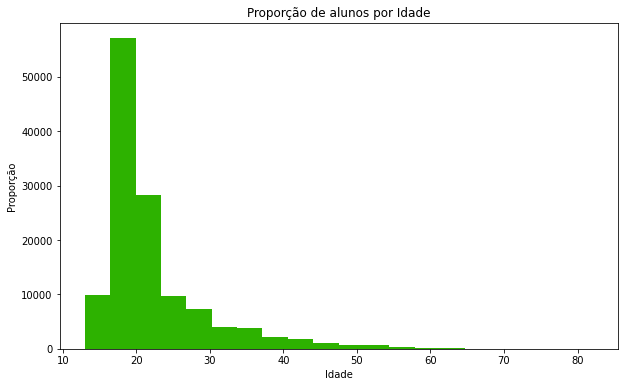

In [84]:
# DESAFIO 3 #

d = dados['NU_IDADE']                         # Atribui os dados da coluna no objeto 'd'.
plt.figure(figsize=(10,6))                    # Tamanho da imagem.
plt.hist(d, bins=(20), color='#2DB200')       # Dados, Quantidade de Espaços e Cor das Barras.
plt.title('Proporção de alunos por Idade')    # Título do Gráfico.
plt.xlabel('Idade')                           # Título da coordenada X.
plt.ylabel('Proporção')                       # Título da coodenada Y.
plt.show()                                    # Mostra o Gráfico.
plt.close()                                   # Fecha a ação.

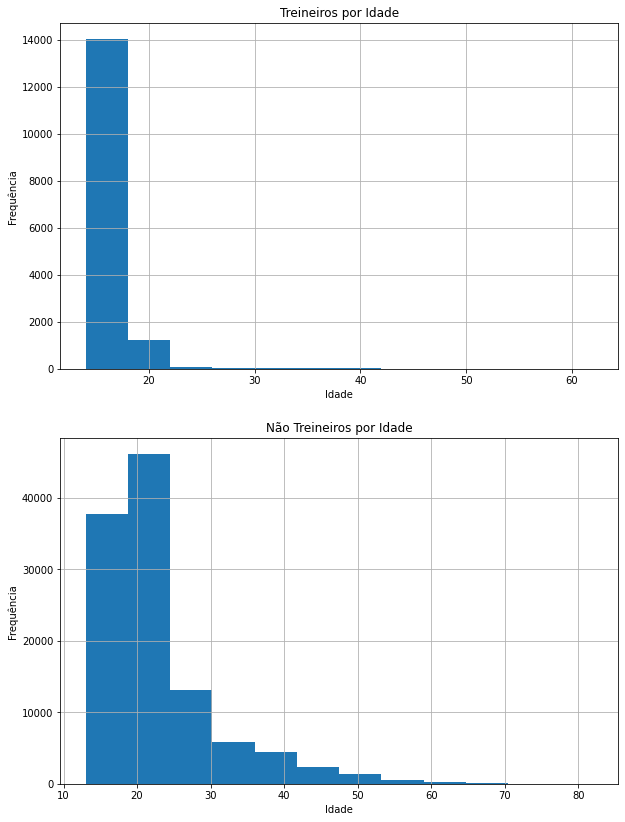

In [211]:
# DESAFIO 4 #

treineiros_idade = dados.query("IN_TREINEIRO == 1")["NU_IDADE"]
n_treineiros_idade = dados.query("IN_TREINEIRO == 0")["NU_IDADE"]

plt.figure(figsize=(10, 14))
plt.subplot(211)
treineiros_idade.plot(kind='hist', grid=True, bins=12, title='Treineiros por Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.subplot(212)
n_treineiros_idade.plot(kind='hist', grid=True, bins=12, title='Não Treineiros por Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

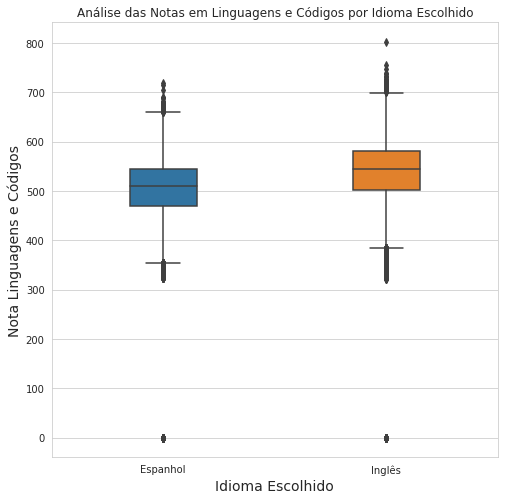

In [213]:
# Desafio 5 #

linguas = dados["TP_LINGUA"]
linguas.replace({0: 'Inglês', 1: 'Espanhol'}, inplace=True)
notas_lc_por_lingua = pd.concat([dados["NU_NOTA_LC"].to_frame(), linguas.to_frame()], axis=1)
notas_lc_por_lingua

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(x="TP_LINGUA", y="NU_NOTA_LC", data=notas_lc_por_lingua, width=0.3)
ax.xaxis.set_label_text("Idioma Escolhido", fontdict={'fontsize': 14})
ax.yaxis.set_label_text("Nota Linguagens e Códigos", fontdict={'fontsize': 14})
ax.set_title("Análise das Notas em Linguagens e Códigos por Idioma Escolhido")
plt.show()

***Desafios***

**Desafio 01:** Proporção dos inscritos por idade.

**Desafio 02:** Descobrir de quais estados são os inscritos de 13 anos.

**Desafio 03:** Adicionar título no gráfico.

**Desafio 04:** Plotar os Histogramas das idades dos treineiros e não treineiros.

**Desafio 05:** Comparar as distribuições das provas em Inglês e Espanhol.